# Generating animated time series  <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
s2a_msil2a, s2b_msil2a

## Background
Animations can be a powerful method for visualising change in the landscape across time using satellite imagery. Satellite data from Digital Earth Africa is an ideal subject for animations as it has been georeferenced, processed to analysis-ready surface reflectance, and stacked into a spatio-temporal 'data cube', allowing landscape conditions to be extracted and  visualised consistently across time.

Using functions based on `matplotlib.animation` and `xarray`, we can take a time series of Digital Earth Africa satellite imagery and export a visually appealing time series animation that shows how any location in Africa has changed.

## Description
This notebook demonstrates how to:

1. Import a time series of cloud-free satellite imagery from multiple satellites (i.e. Sentinel-2A and 2B) as an `xarray` dataset
2. Plot the data as a time series animation 
3. Export the resulting animations as either a GIF or MP4 file

***

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [1]:
%matplotlib inline

import sys
import datacube
import matplotlib.pyplot as plt
from IPython.display import Image

sys.path.append('../Scripts')
from deafrica_plotting import animated_timeseries
from deafrica_plotting import rgb
from deafrica_datahandling import load_ard, mostcommon_crs
from deafrica_plotting import display_map


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='Animated_timeseries')

## Load satellite data from datacube
We can use the `load_ard()` function to load data from multiple satellites (i.e. Sentinel-2A and -2B), and return a single `xarray.Dataset` containing only observations with a minimum percentage of good quality pixels. 
This will allow us to create a visually appealing time series animation of observations that are not affected by cloud.

In the example below, we request that the function returns only observations which are 95% free of clouds and other poor quality pixels by specifyinge `min_gooddata=0.95`.

In [3]:
lat, lon = 8.57, -2.4  # Bui Reservoir inlet
buffer = 0.05

x = (lon - buffer, lon + buffer)
y =  (lat + buffer, lat - buffer)

# Create a reusable query
query = {
    'x': x,
    'y': y,
    'time': ('2017-10-10', '2018-01-10'),
    'resolution': (-30, 30)
}

### View the selected location

In [4]:
display_map(x=x, y=y)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [5]:
# Load available data
ds = load_ard(dc=dc, 
              products=['s2a_msil2a', 's2b_msil2a'],
              measurements=['red', 'green', 'blue', 'nir_1', 'swir_1', 'swir_2'],
              group_by='solar_day',
              output_crs='epsg:32630', 
              min_gooddata=0.95,
              mask_pixel_quality=False,
              **query)

# Print output data
print(ds)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_msil2a
    s2b_msil2a
Counting good quality pixels for each time step
Filtering to 13 out of 19 time steps with at least 95.0% good quality pixels
Loading 13 time steps
<xarray.Dataset>
Dimensions:  (time: 13, x: 369, y: 370)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-17T10:40:55.822000 ... 2018-01-10T10:41:38.429000
  * y        (y) float64 9.529e+05 9.529e+05 9.528e+05 ... 9.419e+05 9.418e+05
  * x        (x) float64 5.605e+05 5.605e+05 5.606e+05 ... 5.715e+05 5.715e+05
Data variables:
    red      (time, y, x) float32 443.0 450.0 462.0 451.0 ... 528.0 541.0 561.0
    green    (time, y, x) float32 679.0 684.0 688.0 672.0 ... 679.0 678.0 672.0
    blue     (time, y, x) float32 259.0 274.0 256.0 261.0 ... 547.0 547.0 550.0
    nir_1    (time, y, x) float32 3087.0 3131.0 3073.0 ... 411.0 476.0 618.0
    swir_1   (time, y, x) float32 1671.0 1696.0 1685.0 ... 378.0 399.0 436.0
    swir_2   (time, y, x) flo

To get a quick idea of what the data looks like, we can plot the dataset in true colour using the `rgb` function:

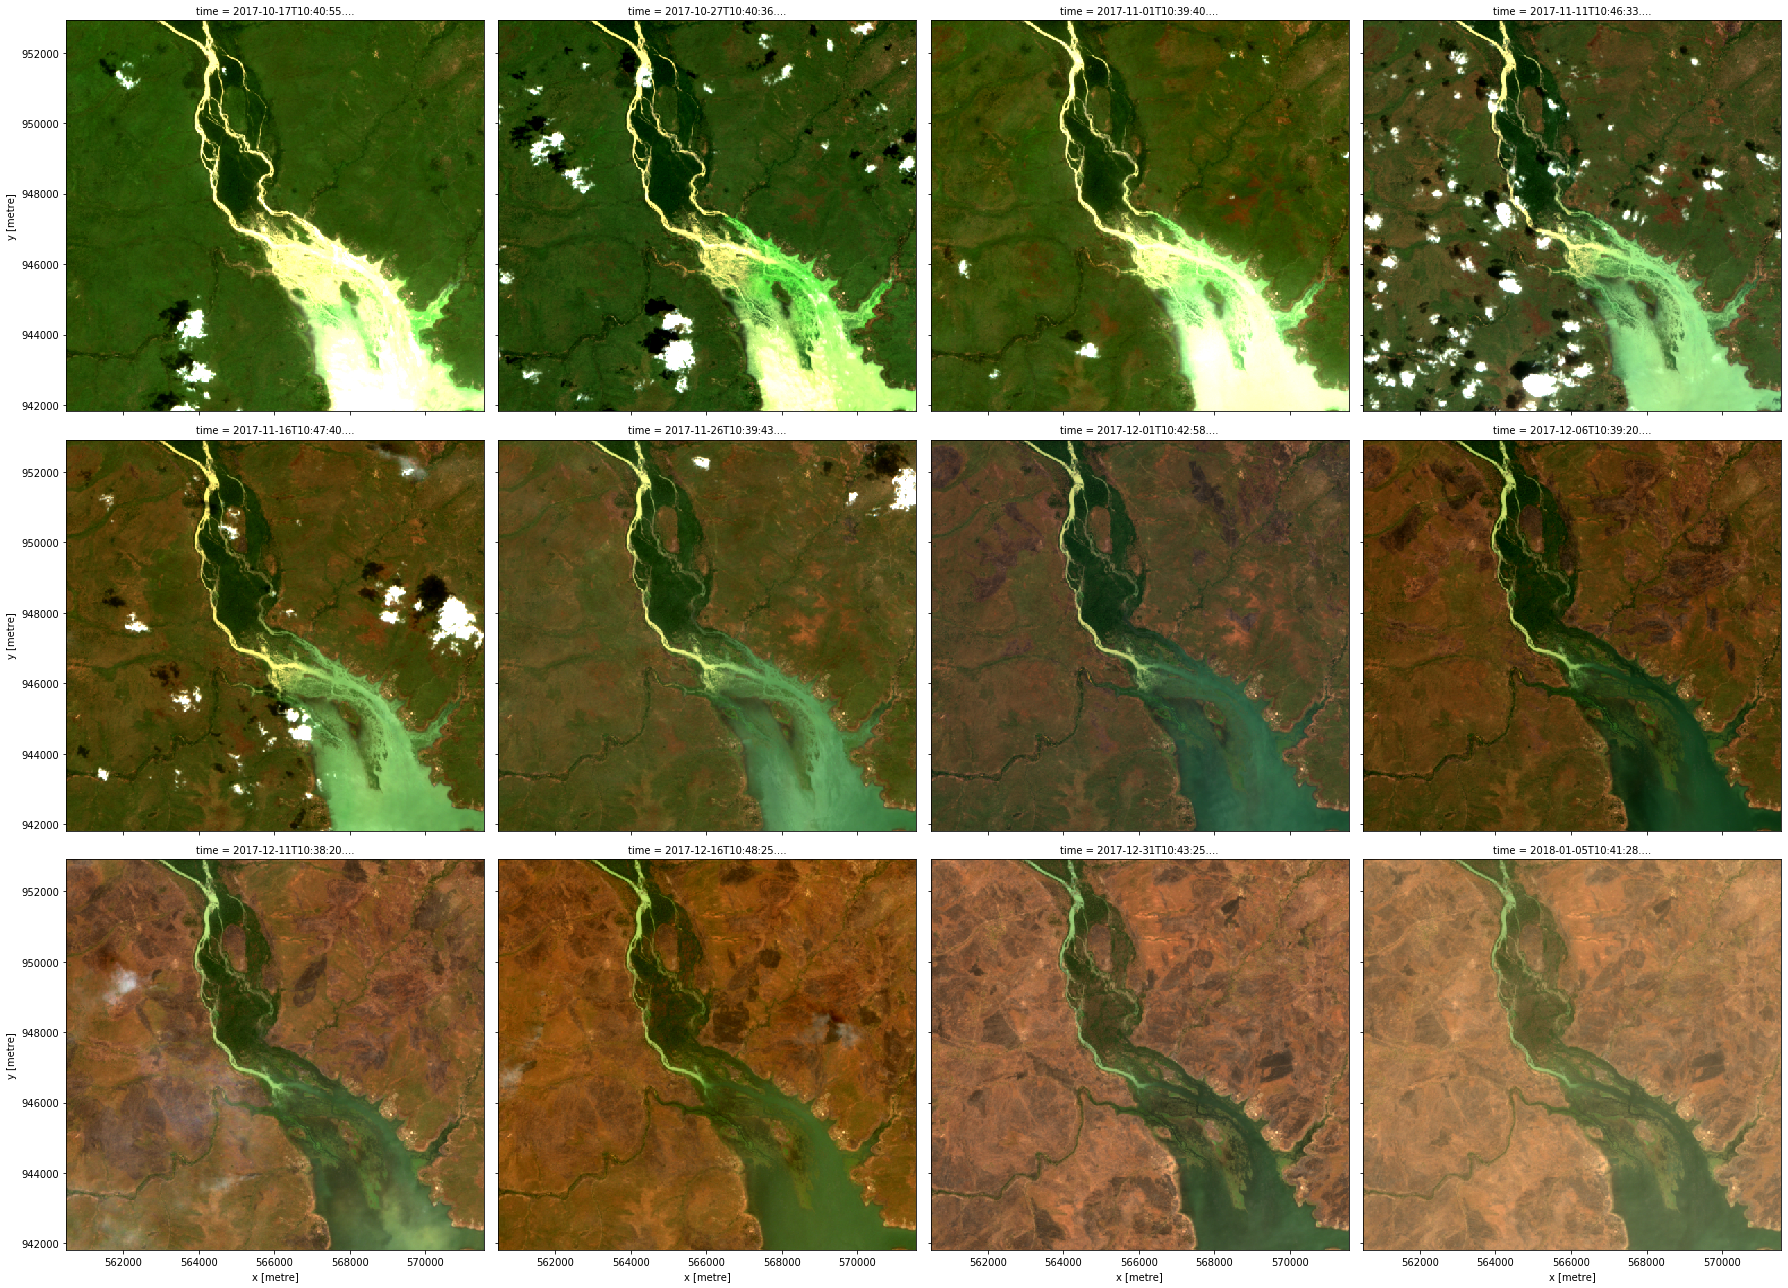

In [6]:
# Plot images from the dataset
rgb(ds, index=list(range(0, 12)))


## Plot time series as a RGB/three band animated GIF
The `animated_timeseries()` function is based on functionality within `matplotlib.animation`. 
It takes an `xarray.Dataset` and exports a one band or three band (e.g. true or false colour) GIF or MP4 animation showing changes in the landscape across time. 

Here, we plot the dataset we loaded above as an animated GIF. 
The interval between the animation frames is set to to 200 milliseconds and the width of the animation to 500 pixels (the default values). 
For a three-band RGB animation like this, the function will automatically select an appropriate colour stretch by clipping the data to remove values smaller or greater than the 2 and 98th percentiles. 
This can be controlled further with the `percentile_stretch` parameter.

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


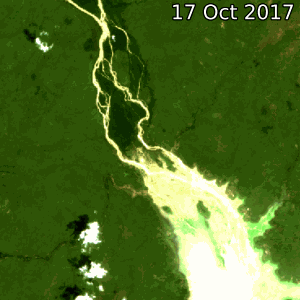

In [7]:
# Produce time series animation of red, green and blue bands
animated_timeseries(ds=ds, 
                    output_path='animated_timeseries.gif',                                
                    interval=200, 
                    width_pixels=300) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')


We can also use different band combinations (e.g. false colour), add a title, and change the font size using `annotation_kwargs`, which passes a dictionary of values to the matplotlib `plt.annotate` function (see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html for options):

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


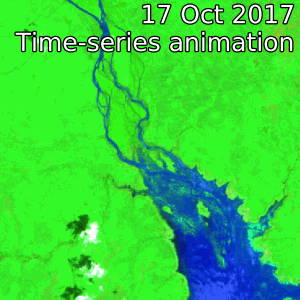

In [8]:
# Produce time series animation of red, green and blue bands
animated_timeseries(ds=ds, 
                    output_path='animated_timeseries.gif',  
                    bands=['swir_2', 'nir_1', 'green'],
                    interval=200, 
                    width_pixels=300,
                    title='Time-series animation',
                    percentile_stretch=[0.01, 0.99],
                    annotation_kwargs={'fontsize': 25}) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')

### Plotting single band animations
It is also possible to plot a single band image instead of a three band image. 
For example, we could plot an index like the Normalized Difference Water Index (NDWI), which has high values where a pixel is likely to be open water (e.g. NDWI > 0). 

By default the colour bar limits are set based on `percentile_stretch` which will discard outliers/extreme values to optimise the colour stretch (set `percentile_stretch=(0.0, 1.00)` to show the full range of values from min to max).

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


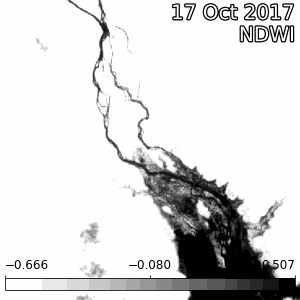

In [9]:
# Compute NDWI using the formula (green - nir) / (green + nir). 
# This will calculate NDWI for every time-step in the dataset:
ds['NDWI'] = ((ds.green - ds.nir_1) / 
              (ds.green + ds.nir_1))

# Produce time series animation of NDWI:
animated_timeseries(ds=ds, 
                    output_path='animated_timeseries.gif',
                    bands=['NDWI'], 
                    title='NDWI', 
                    width_pixels=300) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')

We can customise animations based on a single band like NDWI by specifying parameters using `onebandplot_kwargs`, which is passed to the matplotlib `plt.imshow` function (see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html for options). 
For example, we can use a more appropriate blue colour scheme with `'cmap': 'Blues'`, and set `'vmin': 0.0, 'vmax': 0.5` to overrule the default colour bar limits with manually specified values:

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


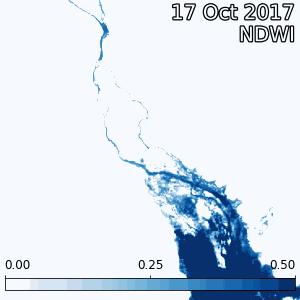

In [10]:
# Produce time series animation using a custom colour scheme and limits:
animated_timeseries(ds=ds,
                    output_path='animated_timeseries.gif',
                    bands=['NDWI'], 
                    width_pixels=300,
                    title='NDWI',
                    onebandplot_kwargs={'cmap': 'Blues',
                                        'vmin': 0.0,
                                        'vmax': 0.5})

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')


Two special kwargs (`tick_fontsize`, `tick_colour`) can be used to control the tick labels on the colourbar. This can be useful for example when the tick labels are difficult to see against a dark background:

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


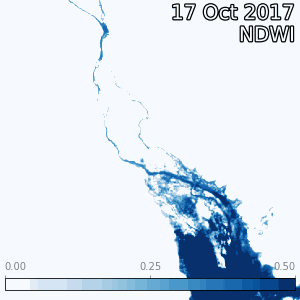

In [11]:
# Produce time series animation using a custom colour scheme and limits:
animated_timeseries(ds=ds, 
                    output_path='animated_timeseries.gif', 
                    bands=['NDWI'], 
                    width_pixels=300, 
                    title='NDWI', 
                    onebandplot_kwargs={'cmap':'Blues', 
                                        'vmin':0.0, 
                                        'vmax':0.5,                                                    
                                        'tick_fontsize': 10, 
                                        'tick_colour': 'grey'}) 

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')

One band animations show a colour bar by default, but this can be disabled:

Generating 13 frame animation
    Exporting animation to animated_timeseries.gif


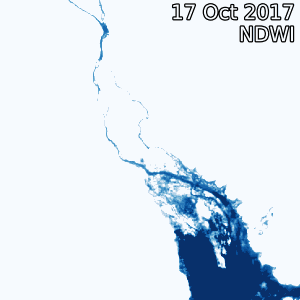

In [12]:
# Produce time series animation without a colour bar:
animated_timeseries(ds=ds,
                    output_path='animated_timeseries.gif',
                    bands=['NDWI'], 
                    width_pixels=300,
                    title='NDWI',
                    onebandplot_kwargs={'cmap': 'Blues',
                                        'vmin': 0.0,
                                        'vmax': 0.5},
                    onebandplot_cbar=False)

# Plot animated gif
plt.close()
Image(filename='animated_timeseries.gif')


## Available output formats
The above examples have focused on exporting animated GIFs, but MP4 files can also be generated. 
The two formats have their own advantages and disadvantages:

* `.mp4`: fast to generate, smallest file sizes and often highest quality; suitable for Twitter/social media and recent versions of Powerpoint
* `.gif`: slow to generate, large file sizes; suitable for all versions of Powerpoint and Twitter/social media
    
    
    

Generating 13 frame animation
    Exporting animation to animated_timeseries.mp4


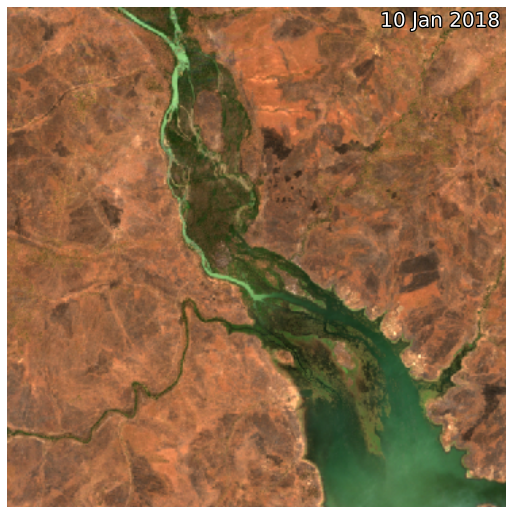

In [13]:
# Animate datasets as a MP4 file
animated_timeseries(ds=ds, output_path='animated_timeseries.mp4')


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Last modified:** January 2020

**Compatible datacube version:** 

In [14]:
print(datacube.__version__)

1.7+253.ga031f3f4.dirty


## Tags
Browse all available tags on the DE Africa User Guide's [Tags Index](https://) (placeholder as this does not exist yet)